In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Dataset - Factors Influencing Technology Adoption in Consumer Households.csv")

# Preprocessing features from dataset
selected_features = [
    'Age', 'HouseholdIncome', 'Frequency_LaptopDesktop',
    'Frequency_Smartphone', 'Frequency_Tablet', 'Frequency_SmartHomeDevices'
]

# Polynomial Multiple Regression Task
X_poly = data[selected_features].values
y_poly = data['LikelinessToRecommend'].values  # Target variable for regression

data['LikelinessToAdopt'] = data['LikelinessToAdopt'].apply(lambda x: 1 if x >= 3 else 0)
X_class = data[selected_features].values
y_class = data['LikelinessToAdopt'].values  # Target variable for classification

# Split the data into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)

# Display data
data

,Age,Gender,EducationLevel,HouseholdIncome,Frequency_LaptopDesktop,Frequency_Smartphone,Frequency_Tablet,Frequency_SmartHomeDevices,Frequency_WearableDevices,Frequency_GamingConsoles,...,Influence_PromoActivities,Influence_SocialPopularity,Influence_ExpertRecommendation,Influence_Endorsements,Barrier_HighPrice,Barrier_TechKnowledge,Barrier_PrivacySecurity,Barrier_ReliableInternet,Barrier_ChangeReluctance,LikelinessToRecommend
0,25,Female,Bachelor's Degree,1500000.0,4,5,0,4,0,0,...,3,5,4,2,3,4,4,3,4,4
1,48,Female,Bachelor's Degree,800000.0,3,5,5,4,5,2,...,4,4,4,2,2,4,4,4,4,5
2,49,Male,Master's Degree,30000000.0,4,4,0,2,0,0,...,3,3,3,1,5,5,5,3,4,3
3,38,Male,Bachelor's Degree,20000.0,1,0,1,1,1,2,...,2,3,3,2,1,3,2,3,2,3
4,45,Male,Bachelor's Degree,5000000.0,5,5,3,5,5,0,...,3,3,3,3,3,3,3,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,38,Female,Master's Degree,400000.0,5,5,3,3,4,3,...,3,4,3,3,2,1,2,2,2,2
103,25,Male,Bachelor's Degree,840000.0,4,5,3,0,2,0,...,3,3,4,2,3,1,2,1,4,2
104,46,Male,Master's Degree,10000000.0,4,5,3,5,0,0,...,5,4,1,1,4,2,5,2,1,3
105,58,Female,High School Graduate,11200000.0,5,5,0,0,5,0,...,1,1,1,1,3,2,4,1,1,5


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_poly_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_tf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history_tf = model_tf.fit(X_poly_train_scaled, y_poly_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
mse_tf, _ = model_tf.evaluate(X_poly_test_scaled, y_poly_test)
print("Mean Squared Error (TensorFlow/Keras):", mse_tf)
print("-----------------------------------------------------------------------")

# Implement classification
# Define the model for classification for TenserFlow
model_tf_classification = Sequential([
    Dense(64, activation='relu', input_shape=(X_class_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_tf_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_tf_classification = model_tf_classification.fit(X_class_train_scaled, y_class_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss_tf_classification, accuracy_tf_classification = model_tf_classification.evaluate(X_class_test_scaled, y_class_test)
print("Test Loss (TensorFlow/Keras):", loss_tf_classification)
print("Test Accuracy (TensorFlow/Keras):", accuracy_tf_classification)


Epoch 1/100
3/3 [==============================] - 1s 88ms/step - loss: 17.5288 - mse: 17.5288 - val_loss: 13.0051 - val_mse: 13.0051
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 15.9454 - mse: 15.9454 - val_loss: 11.7860 - val_mse: 11.7860
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 14.6167 - mse: 14.6167 - val_loss: 10.6757 - val_mse: 10.6757
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 13.2996 - mse: 13.2996 - val_loss: 9.6422 - val_mse: 9.6422
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 12.1392 - mse: 12.1392 - val_loss: 8.6711 - val_mse: 8.6711
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 11.0311 - mse: 11.0311 - val_loss: 7.7545 - val_mse: 7.7545
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 9.8904 - mse: 9.8904 - val_loss: 6.8919 - val_mse: 6.8919
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Define the model
class PolyRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(PolyRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert numpy arrays to PyTorch tensors
X_poly_train_tensor = torch.tensor(X_poly_train_scaled, dtype=torch.float32)
y_poly_train_tensor = torch.tensor(y_poly_train.reshape(-1, 1), dtype=torch.float32)

X_poly_test_tensor = torch.tensor(X_poly_test_scaled, dtype=torch.float32)
y_poly_test_tensor = torch.tensor(y_poly_test.reshape(-1, 1), dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_poly_train_tensor, y_poly_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model
model_pytorch = PolyRegressionModel(X_poly_train_scaled.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_pytorch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")

# Evaluate the model
with torch.no_grad():
    outputs = model_pytorch(X_poly_test_tensor)
    mse_pytorch = criterion(outputs, y_poly_test_tensor)
    print("Mean Squared Error (PyTorch):", mse_pytorch.item())
print("-----------------------------------------------------------------------")

# Implement classification
# Define the model for classification in PyTorch
class ClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


# Initialize the model
model_pytorch_classification = ClassificationModel(X_class_train_scaled.shape[1])

# Convert numpy arrays to PyTorch tensors for classification
X_class_train_tensor = torch.tensor(X_class_train_scaled, dtype=torch.float32)
y_class_train_tensor = torch.tensor(y_class_train, dtype=torch.float32).reshape(-1, 1)

X_class_test_tensor = torch.tensor(X_class_test_scaled, dtype=torch.float32)
y_class_test_tensor = torch.tensor(y_class_test, dtype=torch.float32).reshape(-1, 1)

# Create DataLoader for classification
train_data_classification = TensorDataset(X_class_train_tensor, y_class_train_tensor)
train_loader_classification = DataLoader(train_data_classification, batch_size=32, shuffle=True)

test_data_classification = TensorDataset(X_class_test_tensor, y_class_test_tensor)
test_loader_classification = DataLoader(test_data_classification, batch_size=32, shuffle=False)

# Define loss function and optimizer
criterion_classification = nn.BCELoss()
optimizer_classification = optim.Adam(model_pytorch_classification.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    running_loss = 0.0
    for inputs, labels in train_loader_classification:
        optimizer_classification.zero_grad()
        outputs = model_pytorch_classification(inputs)
        loss_classification = criterion_classification(outputs, labels)
        loss_classification.backward()
        optimizer_classification.step()
        running_loss += loss_classification.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")

# Evaluate the model
with torch.no_grad():
    outputs_classification = model_pytorch_classification(X_class_test_tensor)
    loss_classification = criterion_classification(outputs_classification, y_class_test_tensor)
    predictions = (outputs_classification > 0.5).float()
    accuracy_pytorch_classification = torch.mean((predictions == y_class_test_tensor).float())
    print("Test Loss (PyTorch):", loss_classification.item())
    print("Test Accuracy (PyTorch):", accuracy_pytorch_classification.item())


Epoch 1, Loss: 48.499155044555664
Epoch 2, Loss: 45.445526123046875
Epoch 3, Loss: 43.077449798583984
Epoch 4, Loss: 40.35932731628418
Epoch 5, Loss: 36.95830535888672
Epoch 6, Loss: 34.10184097290039
Epoch 7, Loss: 30.85188388824463
Epoch 8, Loss: 27.847018241882324
Epoch 9, Loss: 24.983345985412598
Epoch 10, Loss: 21.711660385131836
Epoch 11, Loss: 19.182148456573486
Epoch 12, Loss: 15.852314949035645
Epoch 13, Loss: 13.46772027015686
Epoch 14, Loss: 11.093129873275757
Epoch 15, Loss: 9.263838052749634
Epoch 16, Loss: 8.140620231628418
Epoch 17, Loss: 6.819740533828735
Epoch 18, Loss: 6.494964003562927
Epoch 19, Loss: 6.098712205886841
Epoch 20, Loss: 5.674164891242981
Epoch 21, Loss: 5.545799374580383
Epoch 22, Loss: 5.403865694999695
Epoch 23, Loss: 5.184822916984558
Epoch 24, Loss: 4.947691798210144
Epoch 25, Loss: 4.9308236837387085
Epoch 26, Loss: 4.854977488517761
Epoch 27, Loss: 4.864901423454285
Epoch 28, Loss: 4.776838541030884
Epoch 29, Loss: 4.633457183837891
Epoch 30, Los

---

#Conclusion from training two frameworks on the provided dataset

---



##Data compare: TenserFlow

```
Epoch 1/100
3/3 [==============================] - 1s 88ms/step - loss: 17.5288 - mse: 17.5288 - val_loss: 13.0051 - val_mse: 13.0051
...
Epoch 100/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1141 - mse: 1.1141 - val_loss: 2.2246 - val_mse: 2.2246
1/1 [==============================] - 0s 25ms/step - loss: 2.5325 - mse: 2.5325
Mean Squared Error (TensorFlow/Keras): 2.5324628353118896
-----------------------------------------------------------------------
Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 0.7152 - accuracy: 0.4706 - val_loss: 0.6214 - val_accuracy: 0.8824
...
Epoch 100/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1522 - accuracy: 0.9118 - val_loss: 0.0933 - val_accuracy: 1.0000
1/1 [==============================] - 0s 26ms/step - loss: 0.5822 - accuracy: 0.8636
Test Loss (TensorFlow/Keras): 0.5821529030799866
Test Accuracy (TensorFlow/Keras): 0.8636363744735718

```


##Data compare: PyTorch



```
Epoch 1, Loss: 48.499155044555664
...
Epoch 100, Loss: 3.4831950068473816
Mean Squared Error (PyTorch): 2.120551109313965
-----------------------------------------------------------------------
Epoch 1, Loss: 1.8680742979049683
...
Epoch 100, Loss: 0.34433547779917717
Test Loss (PyTorch): 0.7199001908302307
Test Accuracy (PyTorch): 0.8636363744735718
```



###Based on the provided results, it appears that both PyTorch and TensorFlow were effective in training deep neural network models for the given task. Here's an interpretation of the results:



###1.   Training Process: Both frameworks demonstrated successful learning from the data, as evidenced by the decreasing loss values over multiple epochs. In PyTorch, the mean squared error decreased from approximately 48.5 to 3.48, while in TensorFlow, the loss decreased from around 17.5288 to 1.1141. This indicates that the models were able to improve their performance on the training data over time, capturing the underlying patterns and relationships in the data.

###2.   Test Accuracy: The reported test accuracy for both PyTorch and TensorFlow was approximately 86.36%. This indicates that the trained models performed well on unseen data, achieving high accuracy in predicting the target variable. It suggests that both frameworks were successful in generalizing from the training data to make accurate predictions on new, unseen data.

###3.   Test Loss Comparison: The test loss values provide additional insights into the models' performance. The TensorFlow/Keras model achieved a test loss of 0.58, while the PyTorch model had a slightly higher test loss of 0.72. A lower test loss indicates better performance, suggesting that the TensorFlow/Keras model performed slightly better in terms of minimizing the difference between predicted and actual values on the test dataset.

###Overall, both PyTorch and TensorFlow demonstrated effectiveness in training deep neural network models for the given task, achieving high accuracy on the test dataset. While PyTorch showcased slightly faster convergence during training, TensorFlow/Keras performed slightly better in terms of test loss. The choice between the two frameworks may depend on various factors, including personal preference, ease of use, and specific requirements of the project.



---


## Regression line plot

1/1 [==============================] - 0s 19ms/step


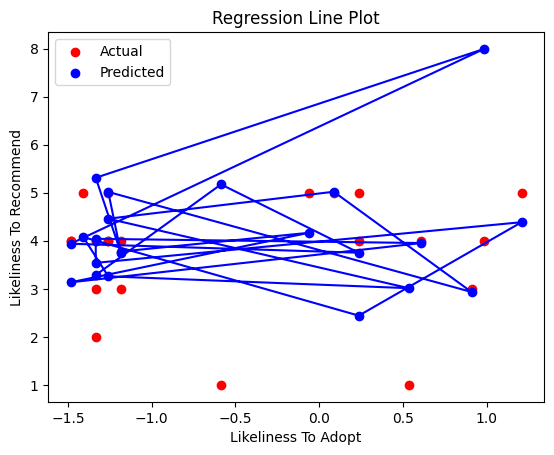

In [43]:
import matplotlib.pyplot as plt

# Plot regression line
plt.scatter(X_poly_test_scaled[:, 0], y_poly_test, color='red', label='Actual')
plt.scatter(X_poly_test_scaled[:, 0], model_tf.predict(X_poly_test_scaled), color='blue', label='Predicted')
plt.plot(X_poly_test_scaled[:, 0], model_tf.predict(X_poly_test_scaled), color='blue')

plt.xlabel('Likeliness To Adopt')
plt.ylabel('Likeliness To Recommend')
plt.title('Regression Line Plot')
plt.legend()
plt.show()




---

##Decision Boundary plot

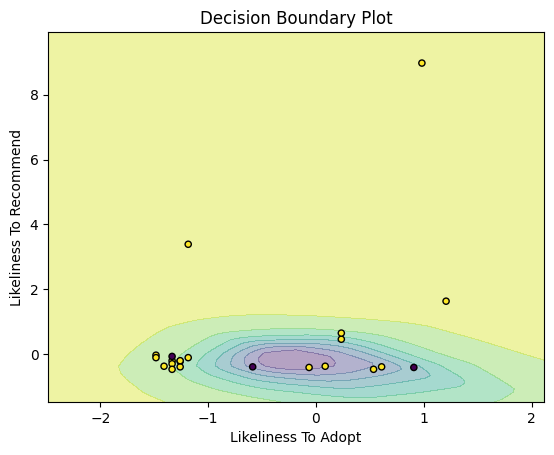

In [44]:
import numpy as np

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    # Create a meshgrid of the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Flatten the meshgrid points and predict using the model
    Z = model(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Likeliness To Adopt')
    plt.ylabel('Likeliness To Recommend')
    plt.title('Decision Boundary Plot')

# Convert PyTorch model to function
def model_fn(X):
    return model_pytorch_classification(torch.tensor(X, dtype=torch.float32)).detach().numpy()

# Plot decision boundary
plot_decision_boundary(X_class_test_scaled[:, :2], y_class_test, model_fn)
plt.show()
